**Get information on disk space, memory, resource of virtual machine** 

In [1]:
# Disk information
!df -h
# CPU information
!lscpu | grep "MHz"

# If you want to use a GPU
# you MUST FIRST go to Edit -> Notebook Settings
# and select GPU under Hardware accelerator
!nvidia-smi -L
!nvcc --version

# Memory information
!cat /proc/meminfo | grep 'MemAvailable'

Filesystem      Size  Used Avail Use% Mounted on
overlay          79G   41G   38G  52% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  812M  59% /sbin/docker-init
tmpfs           6.4G   32K  6.4G   1% /var/colab
/dev/sda1        86G   44G   43G  51% /opt/bin/.nvidia
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
CPU MHz:             2000.204
GPU 0: Tesla T4 (UUID: GPU-fe204809-4330-4c15-b789-f7be21867e5a)
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
MemAvailable:   12404340 kB



# Install CaImAn along with required packages

In [2]:
# Check existence of installation folder (colab deletes stuff every 24 hrs)
# CaImAn pckages cannot overwrite an existing directory
import os   
if os.path.isdir('/content/CaImAn/'):
  %rm -rf '/content/CaImAn'

In [3]:
# Install CaImAn
!git clone https://github.com/flatironinstitute/CaImAn.git
%cd /content/CaImAn
!pip install -r requirements.txt
!pip install -e .
!python caimanmanager.py install --inplace

!export MKL_NUM_THREADS=1
!export OPENBLAS_NUM_THREADS=1

# This is for GPU accelaration
!pip install pycuda
!pip install scikit-cuda

# Additional packages 
!pip install tifffile
!pip install ipyparallel
!pip install peakutils
!pip install scipy

Cloning into 'CaImAn'...
remote: Enumerating objects: 24852, done.
remote: Counting objects: 100% (308/308), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 24852 (delta 149), reused 268 (delta 132), pack-reused 24544
Receiving objects: 100% (24852/24852), 519.93 MiB | 20.99 MiB/s, done.
Resolving deltas: 100% (16617/16617), done.
Checking out files: 100% (317/317), done.
/content/CaImAn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 296 kB 13.9 MB/s 
     |████████████████████████████████| 15.3 MB 63.8 MB/s 
     |████████████████████████████████| 51 kB 827 kB/s 
     |████████████████████████████████| 86 kB 6.8 MB/s 
     |████████████████████████████████| 115 kB 63.6 MB/s 
     |████████████████████████████████| 995 kB 59.3 MB/s 
     |████████████████████████████████| 190 kB 63.8 MB/s 
     |████████████████████████████████| 843 kB 52.0 MB/s 
     |████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/CaImAn
  Running setup.py develop for caiman
Installed /root/caiman_data
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 14.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 78 kB 8.8 MB/s 
     |████████████████████████████████| 69 kB 9.3 MB/s 
  Created wheel for pycuda: filename=pycuda-2021.1-cp37-cp37m-linux_x86_64.whl size=626634 sha256=b4d26ad344d490be03414f04376f17420b2bbad4a32785678721ee675b8f28a1
  Stored in directory: /root/.cache/pip/wheels/c4/ef/49/dc6a5feb8d980b37c83d465ecab24949a6aa19458522a9e001
  Created wheel for pytools: filename=pytools-2022.1.9-py2.py3-none-any.whl size=64666 sha256=8302e43090a974676558e85f9337dd4a037841b3099

**Show content of installation folder**

In [4]:
%ls '/content/CaImAn/'

bin/                     environment.yml    readthedocs.yml
build/                   example_movies/    requirements_gpu.txt
caiman/                  ISSUE_TEMPLATE.md  requirements.txt
caiman.egg-info/         Jenkinsfile        sandbox/
caimanmanager.py*        LICENSE.txt        setup.py*
CHANGELOG.txt            model/             SLURM/
CONTRIBUTING.md          mypy.ini           test/
demos/                   nbexec.py*         testdata/
Dockerfile               pylint-all.sh*     test_demos.sh*
docs/                    pylintrc           use_cases/
environment-minimal.yml  README.md          VERSION


**Import packages**

In [5]:
import bokeh.plotting as bpl  
import cv2
import glob
import logging
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import imageio
import scipy
import time
from IPython.display import HTML
from base64 import b64encode
import os
from moviepy.editor import *


try:
    cv2.setNumThreads(0)
except:
    pass

try:
    if __IPYTHON__:
        # this is used for debugging purposes only. allows to reload classes
        # when changed
        get_ipython().magic('load_ext autoreload')
        get_ipython().magic('autoreload 2')
except NameError:
    pass


Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3645440/45929032 bytes (7.9%)7757824/45929032 bytes (16.9%)11747328/45929032 bytes (25.6%)15613952/45929032 bytes (34.0%)19234816/45929032 bytes (41.9%)22110208/45929032 bytes (48.1%)25174016/45929032 bytes (54.8%)28827648/45929032 bytes (62.8%)32628736/45929032 bytes (71.0%)36659200/45929032 bytes (79.8%)40517632/45929032 bytes (88.2%)44531712/45929032 bytes (97.0%)

In [6]:
import caiman as cm
from caiman.source_extraction.cnmf import cnmf as cnmf
from caiman.source_extraction.cnmf import params as params
from caiman.utils.utils import download_demo
from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour
from caiman.motion_correction import MotionCorrect
from caiman.summary_images import local_correlations_movie_offline
from scipy.ndimage import center_of_mass
#from scipy import special
import scipy.special
from IPython.display import display, clear_output
import peakutils

# import caiman as cm
# from caiman.motion_correction import MotionCorrect
# from caiman.source_extraction.cnmf import cnmf as cnmf
# from caiman.source_extraction.cnmf import params as params
# from caiman.utils.utils import download_demo
# from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour, inspect_correlation_pnr
# import peakutils
# bpl.output_notebook()

In [7]:
def plot_results(cnm_obj, num_traces = 10, time_int=0.5, indexes=None):
  if indexes is None:
    indexes = cnm_obj.estimates.idx_components
  indexes = np.random.permutation(indexes)[:num_traces]
  masks = np.reshape(cnm_obj.estimates.A.toarray(),cnm_obj.estimates.dims+(-1,), order='F').transpose([2,0,1])  
  masks = masks[indexes] 
  C = cnm_obj.estimates.C[indexes]
  traces = C + cnm_obj.estimates.YrA[indexes]  
  
  for i in range(masks.shape[0]):  
    fig = plt.figure(constrained_layout=True,figsize=(16,6))
    gs = fig.add_gridspec(1, 3)
    ax1 = fig.add_subplot(gs[:1])
    ax2 = fig.add_subplot(gs[1:])            
    ax1.imshow(masks[i])  
    plt.axis('off')     
    ax2.plot(traces[i], label='traces')
    ax2.plot(C[i], label='denoised')   
    display(fig)
    clear_output(wait=True)    
    plt.pause(time_int)

**Set up paths**

Access data in Box/other folder, saving results, notification in your gmail (should you want notifications that analysis is done).

In [8]:
#access_token = '' # Get your access token from https://developer.box.com/guides/authentication/tokens/ 
path_to_analyze = "/content/CaImAn/neurofinder_data/" 
path_to_results = "/content/CaImAn/results/neurofinder_results/" # Where to save the data
#alert_gmail = '' # You can leave your Gmail adress to be notified when your analysis is done
#alert_gmail_password = '' # Password to your Gmail account

**Create output directory**

In [9]:
if not os.path.isdir(path_to_results):
  os.makedirs(path_to_results, exist_ok=True)

In [10]:
print(path_to_analyze)

/content/CaImAn/neurofinder_data/


**Import data (check if directory is empty)**

In [11]:
upload_ = False 
if not os.path.isdir(path_to_analyze):
  %mkdir $path_to_analyze
  %cd path_to_analyze
  upload_ = True
else:
  dir = os.listdir(path_to_analyze)
  if len(dir) == 0:
    print("Empty directory")
    upload_ = True

if upload_:
  %cd $path_to_analyze
  from google.colab import files
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))


[Errno 2] No such file or directory: 'path_to_analyze'
/content/CaImAn
/content/CaImAn/neurofinder_data


Saving image00000.tiff to image00000.tiff
Saving image00001.tiff to image00001.tiff
Saving image00002.tiff to image00002.tiff
Saving image00003.tiff to image00003.tiff
Saving image00004.tiff to image00004.tiff
Saving image00005.tiff to image00005.tiff
Saving image00006.tiff to image00006.tiff
Saving image00007.tiff to image00007.tiff
Saving image00008.tiff to image00008.tiff
Saving image00009.tiff to image00009.tiff
Saving image00010.tiff to image00010.tiff
Saving image00011.tiff to image00011.tiff
Saving image00012.tiff to image00012.tiff
Saving image00013.tiff to image00013.tiff
Saving image00014.tiff to image00014.tiff
Saving image00015.tiff to image00015.tiff
Saving image00016.tiff to image00016.tiff
Saving image00017.tiff to image00017.tiff
Saving image00018.tiff to image00018.tiff
Saving image00019.tiff to image00019.tiff
Saving image00020.tiff to image00020.tiff
Saving image00021.tiff to image00021.tiff
Saving image00022.tiff to image00022.tiff
Saving image00023.tiff to image000

### Set up logger (optional)
You can log to a file using the filename parameter, or make the output more or less verbose by setting level to `logging.DEBUG`, `logging.INFO`, `logging.WARNING`, or `logging.ERROR`. A filename argument can also be passed to store the log file

In [12]:
logging.basicConfig(format= "%(relativeCreated)12d [%(filename)s:%(funcName)20s():%(lineno)s] [%(process)d] %(message)s",
                    # filename="/tmp/caiman.log",
                    level=logging.WARNING)

### Select file(s) to be processed and save a multipage tiff
Remember to pass the `fnames` variable as a list.

In [13]:
from glob import glob

# # Path to the dir containing images (Works for multiple tiff files or multipage tiff files)
fnames = glob("/content/CaImAn/neurofinder_data/*.tiff")
# Sort in alphabetical order (should also work for numbers)
fnames.sort()
#print(fnames)

In [14]:
# Read individual tiff files and save a multipage tiff 

import skimage.io as skio
data = skio.imread(fnames[0])
arraylist = np.empty((len(fnames), len(data[0]), len(data[1])))
for i in range(len(fnames)):
  arraylist[i,:,:] = skio.imread(fnames[i])

# from PIL import Image 
# im = Image.fromarray(arraylist, mode='F') # float32
# im.save(os.path.join(path_to_analyze, "alltiffs.tiff"), "TIFF")

from tifffile import imsave
multitiff = os.path.join(path_to_analyze, "alltiffs.tiff"); 
if not os.path.isfile(multitiff):
  imsave(multitiff, arraylist)
else:
  %rm $multitiff 
  imsave(multitiff, arraylist)

###Visualize a couple of images for sanity


Text(0.5, 1.0, 'Image')

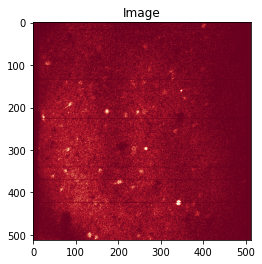

In [16]:
# Display a couple of frames 
# clip = VideoFileClip(fnames[0])
# clip.save_frame(path_to_results + 'frame.png')

# img = mpl.image.imread(path_to_results + 'frame.png')
# imgplot = plt.imshow(img); plt.title('Original size')

img = plt.imread(fnames[0])
plt.imshow(img[:, :], cmap=plt.cm.RdGy)
plt.title('Image')


### Play the movie (optional)
Exercise: Write a small script to play the calcium image movie. This will require you to load the files into memory, and save a video (.mp4) file that can be played directly in an embedded figure in the jupyter notebook. For reference, see [demo_pipeline.ipynb](https://github.com/flatironinstitute/CaImAn/tree/master/demos/notebooks)

### Setup some parameters in a `params` object
We set some parameters that are relevant to the file, and then parameters for motion correction, processing with CNMF and component quality evaluation. 

In [ ]:
#%% First setup some parameters for data and motion correction
# dataset dependent parameters
fr = 8             # imaging rate in frames per second
decay_time = 0.4    # length of a typical transient in seconds
dxy = (2., 2.)      # spatial resolution in x and y in (um per pixel) Note the lower than usual spatial resolution here
max_shift_um = (24., 24.)       # maximum shift in um
patch_motion_um = (200., 200.)  # patch size for non-rigid correction in um

# motion correction parameters
motion_correct = True    # flag for performing motion correction
pw_rigid = True       # flag to select rigid vs pw_rigid motion correction
gSig_filt = (8, 8)       # size of high pass spatial filtering, used in 1p data
max_shifts = [int(a/b) for a, b in zip(max_shift_um, dxy)] # maximum allowed rigid shift in pixels
strides = tuple([int(a/b) for a, b in zip(patch_motion_um, dxy)]) # start a new patch for pw-rigid motion correction every x pixels
overlaps = (24, 24) # overlap between pathes (size of patch in pixels: strides+overlaps)
max_deviation_rigid = 3 # maximum deviation allowed for patch with respect to rigid shifts
border_nan = 'copy' # replicate values along the boundary 
use_cuda = False # Set to True to use GPU 


In [ ]:

mc_dict = {
    'fnames': fnames,
    'fr': fr,
    'decay_time': decay_time,
    'dxy': dxy,
    'pw_rigid': pw_rigid,
    'max_shifts': max_shifts,
    'gSig_filt': gSig_filt,
    'strides': strides,
    'overlaps': overlaps,
    'max_deviation_rigid': max_deviation_rigid,
    'border_nan': border_nan,
    'use_cuda': use_cuda
}
opts = params.CNMFParams(params_dict=mc_dict)

### Setup a cluster
To enable parallel processing a (local) cluster needs to be set up. This is done with a cell below. The variable `backend` determines the type of cluster used. The default value `'local'` uses the multiprocessing package. The `ipyparallel` option is also available. More information on these choices can be found [here](https://github.com/flatironinstitute/CaImAn/blob/master/CLUSTER.md). The resulting variable `dview` expresses the cluster option. If you use `dview=dview` in the downstream analysis then parallel processing will be used. If you use `dview=None` then no parallel processing will be employed.

In [ ]:
#%% start a cluster for parallel processing (if a cluster already exists it will be closed and a new session will be opened)
if 'dview' in locals():
    cm.stop_server(dview=dview)
c, dview, n_processes = cm.cluster.setup_cluster(backend='local', n_processes=None, single_thread=False)

###Motion correction

First we create a motion correction object with the parameters specified. Note that the file is not loaded in memory. From the movie above we see that the dateset exhibits non-uniform motion. We will perform piecewise rigid motion correction using the NoRMCorre algorithm. This has already been selected by setting `pw_rigid=True` when defining the parameters object.

In [ ]:
start = time.time()
if motion_correct: 
  # first we create a motion correction object with the specified parameters
  mc = MotionCorrect(multitiff, dview=dview, **opts.get_group('motion')) # rigid motion correction (may take a while)  
  
  # note that the file is not loaded in memory
  # %% Run (piecewise-rigid or rigid motion) correction using NoRMCorre
  mc.motion_correct(save_movie=True)  #save_movie if you want to use the memory-mapped commands below

  # you can include the boundaries of the FOV if you used the 'copy' option
  # during motion correction, although be careful about the components near
  # the boundaries  
  border_to_0 = 0 if mc.border_nan is 'copy' else mc.border_to_0 

end = time.time()

print(end-start)
print('Motion correction completed.')
 

     4513646 [movies.py:      extract_shifts():357] [74] Movie average is negative. Removing 1st percentile.
     4513661 [movies.py:      extract_shifts():375] [74] Movie average is negative. Removing 1st percentile.
     4514543 [movies.py:      extract_shifts():357] [74] Movie average is negative. Removing 1st percentile.
     4514559 [movies.py:      extract_shifts():375] [74] Movie average is negative. Removing 1st percentile.
     4515435 [movies.py:      extract_shifts():357] [74] Movie average is negative. Removing 1st percentile.
     4515449 [movies.py:      extract_shifts():375] [74] Movie average is negative. Removing 1st percentile.


72.43920016288757
Motion correction completed.


(512, 512, 201)


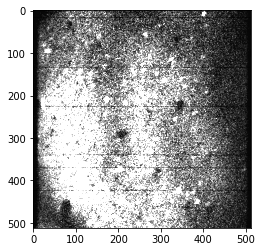

In [ ]:
# memory map the file in order 'C'
fname_new = cm.save_memmap(mc.mmap_file, base_name='memmap_', order='C',
                            border_to_0=border_to_0)  # exclude borders

# now load the file
Yr, dims, T = cm.load_memmap(fname_new)
images = np.reshape(Yr.T, [T] + list(dims), order='F')
# load frames in python format (T x X x Y)
print(images.T.shape)
plt.imshow(images[0], cmap='gray')
plt.gci().set_clim([10,255])


In [ ]:
#%% restart cluster to clean up memory
cm.stop_server(dview=dview)
c, dview, n_processes = cm.cluster.setup_cluster(
    backend='local', n_processes=None, single_thread=False)

Now we are ready to use the motion-corrected images and do the source deconvolution to extract spatial and temoral neuron traces.

First we need to add the parameters specific to this step.

In [ ]:
# %%  parameters for source extraction and deconvolution
p = 1                    # order of the autoregressive system
gnb = 2                  # number of global background components
merge_thr = 0.85         # merging threshold, max correlation allowed
rf = 15

# half-size of the patches in pixels. e.g., if rf=25, patches are 50x50
stride_cnmf = 6          # amount of overlap between the patches in pixels
K = 4                    # number of components per patch
gSig = [10, 10]            # expected half size of neurons in pixels

# initialization method (if analyzing dendritic data using 'sparse_nmf')
method_init = 'greedy_roi'
ssub = 1                     # spatial subsampling during initialization
tsub = 1                     # temporal subsampling during intialization

# parameters for component evaluation
opts_dict = {'fnames': fnames,
              'p': p,
              'fr': fr,
              'nb': gnb,
              'rf': rf,
              'K': K,
              'gSig': gSig,
              'stride': stride_cnmf,
              'method_init': method_init,
              'rolling_sum': True,
              'merge_thr': merge_thr,
              'n_processes': n_processes,
              'only_init': True,
              'ssub': ssub,
              'tsub': tsub}

opts.change_params(params_dict=opts_dict);

In [ ]:
%%capture
#%% RUN CNMF ON PATCHES
# First extract spatial and temporal components on patches and combine them
# for this step deconvolution is turned off (p=0). If you want to have
# deconvolution within each patch change params.patch['p_patch'] to a
# nonzero value
#opts.change_params({'p': 0})
cnm = cnmf.CNMF(n_processes, params=opts, dview=dview)
cnm = cnm.fit(images)

In [ ]:
#%% compute Correlation movie and save results eventually
Cns = local_correlations_movie_offline(mc.mmap_file[0],
                                        remove_baseline=True, window=100, stride=100,
                                        winSize_baseline=10, quantil_min_baseline=10,
                                        dview=dview)
Cn = Cns.max(axis=0)
Cn[np.isnan(Cn)] = 0
cnm.estimates.Cn = Cn

Now we can begin to manually look at the results.

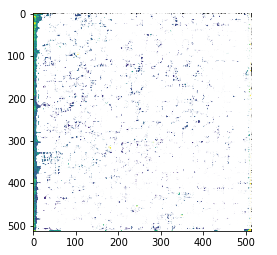

In [ ]:
# %% plot contours of found components
cnm.estimates.plot_contours(img=Cn, display_numbers=True)

In [ ]:
%%capture
# RE-RUN seeded CNMF on accepted patches to refine and perform deconvolution
## this will take > 10 min to run
cnm2 = cnm.refit(images, dview=dview)

     6539884 [warnings.py:        _showwarnmsg():110] [74] /usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  .format(nperseg, input_length))



In [ ]:
# COMPONENT EVALUATION
# the components are evaluated in three ways:
#   a) the shape of each component must be correlated with the data
#   b) a minimum peak SNR is required over the length of a transient
#   c) each shape passes a CNN based classifier
min_SNR = 2  # signal to noise ratio for accepting a component
rval_thr = 0.85  # space correlation threshold for accepting a component
cnn_thr = 0.99  # threshold for CNN based classifier
cnn_lowest = 0.1 # neurons with cnn probability lower than this value are rejected

cnm2.params.set('quality', {'decay_time': decay_time,
                            'min_SNR': min_SNR,
                            'rval_thr': rval_thr,
                            'use_cnn': True,
                            'min_cnn_thr': cnn_thr,
                            'cnn_lowest': cnn_lowest})

cnm2.estimates.evaluate_components(images, cnm2.params, dview=dview)


USING MODEL:/root/caiman_data/model/cnn_model.json
43/43 [==============================] - 3s 62ms/step


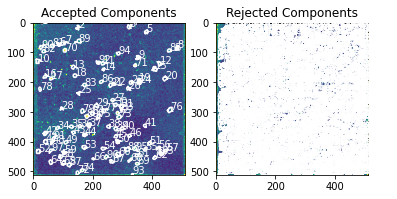

In [ ]:
#%% PLOT COMPONENTS
cnm2.estimates.plot_contours(img=Cn, idx=cnm2.estimates.idx_components)